# The script aim to detect and check markers of MEG data

In [1]:
import os
import mne
import numpy as np

# load data
fif_file_path = r'/mnt/workdir/DCM/sourcedata/sub_072/NeuroData/MEG/run4_tsss.fif'
raw = mne.io.read_raw_fif(fif_file_path,allow_maxshield=True)

Opening raw data file /mnt/workdir/DCM/sourcedata/sub_072/NeuroData/MEG/run4_tsss.fif...
    Range : 26000 ... 193999 =     26.000 ...   193.999 secs
Ready.


<ipython-input-1-9c83e0993002>:7: RuntimeWarning: This filename (/mnt/workdir/DCM/sourcedata/sub_072/NeuroData/MEG/run4_tsss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file_path,allow_maxshield=True)


#### detect marker in channels of raw data

In [2]:
detect_effective_channel = True
if detect_effective_channel:
    ch_names = raw.ch_names
    for i,ch_name in enumerate(ch_names):
        events = mne.find_events(raw, stim_channel=ch_name)
        if len(events)>0:
            print(f'channel-{i},',ch_name)

60 events found
Event IDs: [5]
channel-318, STI001
60 events found
Event IDs: [5]
channel-319, STI002
23 events found
Event IDs: [5]
channel-320, STI003
113 events found
Event IDs: [1 2 3 7]
channel-326, STI101
Trigger channel has a non-zero initial value of 3840 (consider using initial_event=True to detect this event)


#### Plot the marker in target channels


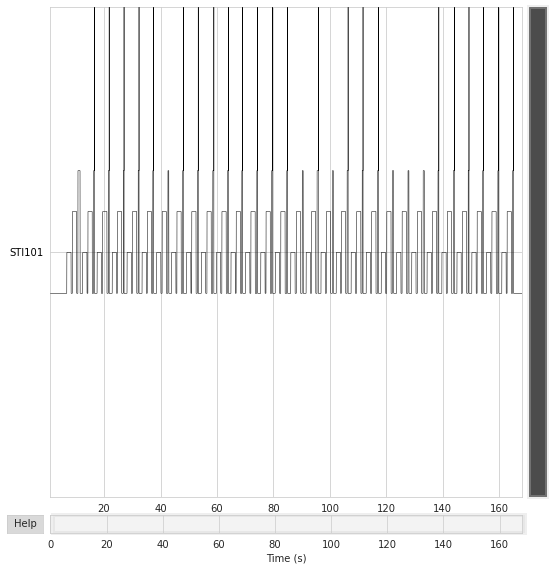

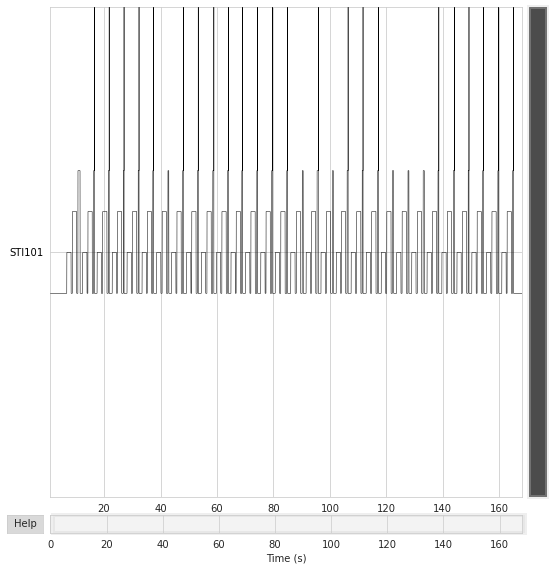

In [25]:
data = raw.copy()
data.pick_channels(ch_names=['STI101']).plot(start=1, duration=200)

#### Check that the markers meet the expectations of the experiment design

In [4]:
ch_marker = mne.find_events(raw, stim_channel='STI101')
pic2_pic1_time_diff = []
dec_pic2_time_diff = []
decision_time1 = []
decision_time2 = []

for index in range(len(ch_marker)-1):
    ontime = ch_marker[index]
    nexttime = ch_marker[index+1]

    ontime_marker = ontime[-1]
    nexttime_marker = nexttime[-1]
    time_diff = nexttime[0] - ontime[0]
    if (nexttime_marker == 2) and (ontime_marker == 1):
        pic2_pic1_time_diff.append(time_diff)
    elif (nexttime_marker == 3) and (ontime_marker == 2):
        dec_pic2_time_diff.append(time_diff)
    if (nexttime_marker == 7) and (ontime_marker == 3):
        decision_time1.append(time_diff)
    if (nexttime_marker == 4) and (ontime_marker == 3):
        decision_time2.append(time_diff)

for t1,t2,t3 in zip(pic2_pic1_time_diff,dec_pic2_time_diff,decision_time1):
    print('Pic2- Pic1 time:',round(t1/1000,3))
    print('Decision rule - Pic2 time:',t2/1000)
    print('Decision time:',round(t3/1000,3))

113 events found
Event IDs: [1 2 3 7]
Pic2- Pic1 time: 1.97
Decision rule - Pic2 time: 1.958
Decision time: 0.314
Pic2- Pic1 time: 1.851
Decision rule - Pic2 time: 2.006
Decision time: 0.33
Pic2- Pic1 time: 1.967
Decision rule - Pic2 time: 1.991
Decision time: 0.296
Pic2- Pic1 time: 1.835
Decision rule - Pic2 time: 2.075
Decision time: 0.33
Pic2- Pic1 time: 1.917
Decision rule - Pic2 time: 2.008
Decision time: 0.346
Pic2- Pic1 time: 1.834
Decision rule - Pic2 time: 1.959
Decision time: 0.313
Pic2- Pic1 time: 1.95
Decision rule - Pic2 time: 2.041
Decision time: 0.333
Pic2- Pic1 time: 1.867
Decision rule - Pic2 time: 2.009
Decision time: 0.396
Pic2- Pic1 time: 1.835
Decision rule - Pic2 time: 1.972
Decision time: 0.347
Pic2- Pic1 time: 1.984
Decision rule - Pic2 time: 2.058
Decision time: 0.349
Pic2- Pic1 time: 1.918
Decision rule - Pic2 time: 1.957
Decision time: 0.314
Pic2- Pic1 time: 1.835
Decision rule - Pic2 time: 1.99
Decision time: 0.362
Pic2- Pic1 time: 1.885
Decision rule - Pic2

In [60]:
import pandas as pd

pic2toRule = [round(point/1000,3) for point in dec_pic2_time_diff]

beh_data = pd.read_csv(r'/mnt/workdir/DCM/sourcedata/sub_072/Behaviour/meg_task-1DInfer/Z64_task-meg_4_2022_Apr_04_0939.csv')
data = beh_data.dropna(axis=0,subset=['cue1.started'])
pic2toRule_psypy = data['cue1.started'] - data['pic2_render.started']
pic2toRule_psypy = [round(time,3) for time in pic2toRule_psypy.to_list()]

t_diff = []
for t1,t2 in zip(pic2toRule,pic2toRule_psypy):
    t_diff.append(t1 - t2)
print(t_diff)
print(np.mean(t_diff))

[0.008999999999999897, 0.022999999999999687, 0.010000000000000009, 0.01100000000000012, 0.010999999999999899, 0.009000000000000119, 0.008000000000000007, 0.008999999999999897, 0.018000000000000016, 0.008000000000000007, 0.010000000000000009, 0.018000000000000016, 0.01499999999999968, 0.010000000000000009, 0.008000000000000007, 0.008000000000000007, 0.009000000000000119, 0.015000000000000124, 0.017999999999999794, 0.006000000000000005, 0.015000000000000124, 0.0040000000000000036, 0.004999999999999893, 0.004999999999999893, 0.006999999999999895, 0.021999999999999797, 0.008999999999999897, 0.007000000000000117, 0.020000000000000018, 0.008000000000000007]
0.011166666666666636


#### conclusion:
1. The time when Monster 1 show, when Monster 2 show, whenRule show have the correct marker. But many of the markers of decision time lost.
2. time of Marker and time from psychopy have 10 ms error(0.5%)